# VLBA conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 1.1.12a0 already installed.


## Download dataset

Original VLBA dataset gotten from https://casaguides.nrao.edu/index.php?title=VLBA_Basic_Phase-referencing_Calibration_and_Imaging.

Reduced the data using:

```Python
mstransform(vis='VLBA_TL016B.ms/',outputvis='VLBA_TL016B_split_lsrk.ms',spw='0:0~5,1:0~5',field='0,1', timerange='2022/02/21/06:14:00~2022/02/21/07:55:45.00', regridms=True,outframe='lsrk',datacolumn='all')
```




In [2]:
import toolviper

toolviper.utils.data.download(file="VLBA_TL016B_split.ms")

[2026-01-21 13:15:37,271]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List         
 ────────────────────── 
  VLBA_TL016B_split.ms

[2026-01-21 13:15:37,288]     INFO    viperlog:  File exists: VLBA_TL016B_split.ms 


Output()

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "VLBA_TL016B_split.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "VLBA_TL016B_split_lsrk.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    partition_scheme=["FIELD_ID"],
    persistence_mode='w',
    main_chunksize=main_chunksize,
)

[2026-01-21 13:15:38,596]     INFO    viperlog:  Updated partition scheme used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2026-01-21 13:15:38,597]     INFO    viperlog:  Number of partitions: 4 
[2026-01-21 13:15:38,598]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [None], FIELD [0], SCAN [0], EPHEMERIS [None] 
[2026-01-21 13:15:38,878]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2026-01-21 13:15:39,080]     INFO    viperlog:  OBSERVATION_ID [0], DDI [1], STATE [None], FIELD [0], SCAN [0], EPHEMERIS [None] 
[2026-01-21 13:15:39,347]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2026-01-21 13:15:39,599]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [None], FIELD [1], SCAN [0], EPHEMERIS [None] 
[2026-01-21 13:15:39,859]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,scan_intents,shape,execution_block_UID,polarization,scan_name,spw_name,spw_intents,field_name,source_name,line_name,field_coords,session_reference_UID,scheduling_block_UID,project_UID,start_frequency,end_frequency
0,VLBA_TL016B_split_0,[None],"(200, 55, 6, 2)",---,"[RR, LL]",[0],spw_0,[UNSPECIFIED],[4C39.25_0],[Unknown],[],"[fk5, 9h27m03.01s, 39d02m20.85s]",---,---,TL016B,5.004000e+09,5.006500e+09
1,VLBA_TL016B_split_1,[None],"(200, 55, 6, 2)",---,"[RR, LL]",[0],spw_1,[UNSPECIFIED],[4C39.25_0],[Unknown],[],"[fk5, 9h27m03.01s, 39d02m20.85s]",---,---,TL016B,5.068000e+09,5.070500e+09
2,VLBA_TL016B_split_2,[None],"(540, 55, 6, 2)",---,"[RR, LL]",[0],spw_0,[UNSPECIFIED],[J1154+6022_1],[Unknown],[],"[fk5, 11h54m04.54s, 60d22m20.82s]",---,---,TL016B,5.004000e+09,5.006500e+09
3,VLBA_TL016B_split_3,[None],"(540, 55, 6, 2)",---,"[RR, LL]",[0],spw_1,[UNSPECIFIED],[J1154+6022_1],[Unknown],[],"[fk5, 11h54m04.54s, 60d22m20.82s]",---,---,TL016B,5.068000e+09,5.070500e+09


In [5]:
ms_xdt = ps_xdt["VLBA_TL016B_split_3"]
ms_xdt

<xarray.DataTree 'VLBA_TL016B_split_3'>
Group: /VLBA_TL016B_split_3
│   Dimensions:                     (time: 540, baseline_id: 55, frequency: 6,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│     * time                        (time) float64 4kB 1.645e+09 ... 1.645e+09
│     * baseline_id                 (baseline_id) int64 440B 0 1 2 3 ... 51 52 53 54
│     * frequency                   (frequency) float64 48B 5.068e+09 ... 5.07e+09
│     * polarization                (polarization) <U2 16B 'RR' 'LL'
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│       baseline_antenna1_name      (baseline_id) <U2 440B dask.array<chunksize=(55,), meta=np.ndarray>
│       baseline_antenna2_name      (baseline_id) <U2 440B dask.array<chunksize=(55,), meta=np.ndarray>
│       field_name                  (time) <U32 69kB dask.array<chunksize=(540,), meta=np.ndarray>
│       scan_name                   (time) <U21 45kB dask.array<chunksize=(540,), meta=np.ndarray>
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 238kB dask.array<chunksize=(20, 55), meta=np.ndarray>
│       FLAG                        (time, baseline_id, frequency, polarization) bool 356kB dask.array<chunksize=(20, 55, 1, 2), meta=np.ndarray>
│       TIME_CENTROID               (time, baseline_id) float64 238kB dask.array<chunksize=(20, 55), meta=np.ndarray>
│       UVW                         (time, baseline_id, uvw_label) float64 713kB dask.array<chunksize=(20, 55, 3), meta=np.ndarray>
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 3MB dask.array<chunksize=(20, 55, 1, 2), meta=np.ndarray>
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 1MB dask.array<chunksize=(20, 55, 1, 2), meta=np.ndarray>
│   Attributes:
│       creation_date:     2026-01-21T18:15:40.171628+00:00
│       creator:           {'software_name': 'xradio', 'version': '1.1.12a0'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'observer': ['PLUTO'], 'observing_log': '[]', 'projec...
│       processor_info:    {'sub_type': '', 'type': ''}
│       schema_version:    4.0.0
│       type:              visibility
├── Group: /VLBA_TL016B_split_3/antenna_xds
│       Dimensions:                 (antenna_name: 10, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           mount                   (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
│           polarization_type       (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
│           station_name            (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
│           telescope_name          (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
│       Attributes:
│           overall_telescope_name:  VLBA
│           relocatable_antennas:    False
│           type:                    antenna
├── Group: /VLBA_TL016B_split_3/field_and_source_base_xds
│       Dimensions:                       (field_name: 1, sky_dir_label: 2)
│       Coordinates:
│         * field_name                    (field_name) <U32 128B 'J1154+6022_1'
│         * sky_dir_label                 

In [6]:
ant_xds = ms_xdt.antenna_xds.ds
ant_xds

<xarray.DatasetView> Size: 6kB
Dimensions:                 (antenna_name: 10, cartesian_pos_label: 3,
                             receptor_label: 2, baseline_id: 55, frequency: 6,
                             polarization: 2, time: 540, uvw_label: 3)
Coordinates:
  * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
  * baseline_id             (baseline_id) int64 440B 0 1 2 3 4 ... 51 52 53 54
  * frequency               (frequency) float64 48B 5.068e+09 ... 5.07e+09
  * polarization            (polarization) <U2 16B 'RR' 'LL'
  * time                    (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
  * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    mount                   (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
    station_name            (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  VLBA
    relocatable_antennas:    False
    type:                    antenna

In [7]:
ant_xds.ANTENNA_POSITION

<xarray.DataArray 'ANTENNA_POSITION' (antenna_name: 10, cartesian_pos_label: 3)> Size: 240B
dask.array<open_dataset-ANTENNA_POSITION, shape=(10, 3), dtype=float64, chunksize=(10, 3), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name         (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    station_name         (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name       (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    coordinate_system:   geocentric
    frame:               ITRS
    origin_object_name:  earth
    type:                location
    units:               m

In [8]:
ant_xds.ANTENNA_POSITION.load()

<xarray.DataArray 'ANTENNA_POSITION' (antenna_name: 10, cartesian_pos_label: 3)> Size: 240B
array([[-2112065.339753, -3705356.513964,  4726813.595927],
       [-1324009.438905, -5332181.956657,  3231962.338382],
       [ 1446374.723555, -4447939.69817 ,  4322306.215011],
       [-1995678.95979 , -5037317.696765,  3357327.949827],
       [-1449752.711882, -4975298.576836,  3709123.785811],
       [-5464075.303632, -2495247.54864 ,  2148297.629883],
       [ -130872.637324, -4762317.087915,  4226850.972202],
       [-2409150.566965, -4478573.065876,  3838617.29146 ],
       [-1640954.066439, -5014816.028293,  3575411.724719],
       [ 2607848.714994, -5488069.460221,  1932739.843634]])
Coordinates:
  * antenna_name         (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                (antenna_name) <U6 240B 'ALT-AZ' 'ALT-AZ' ... 'ALT-AZ'
    station_name         (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
    telescope_name       (antenna_name) <U4 160B 'VLBA' 'VLBA' ... 'VLBA' 'VLBA'
Attributes:
    coordinate_system:   geocentric
    frame:               ITRS
    origin_object_name:  earth
    type:                location
    units:               m

In [9]:
ant_xds.ANTENNA_RECEPTOR_ANGLE

<xarray.DataArray 'ANTENNA_RECEPTOR_ANGLE' (antenna_name: 10, receptor_label: 2)> Size: 160B
dask.array<open_dataset-ANTENNA_RECEPTOR_ANGLE, shape=(10, 2), dtype=float64, chunksize=(10, 2), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name       (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
  * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
    mount              (antenna_name) <U6 240B 'ALT-AZ' 'ALT-AZ' ... 'ALT-AZ'
    polarization_type  (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
    station_name       (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
    telescope_name     (antenna_name) <U4 160B 'VLBA' 'VLBA' ... 'VLBA' 'VLBA'
Attributes:
    type:     quantity
    units:    rad

In [10]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 5kB
Dimensions:                       (field_name: 1, sky_dir_label: 2,
                                   baseline_id: 55, frequency: 6,
                                   polarization: 2, time: 540, uvw_label: 3)
Coordinates:
  * field_name                    (field_name) <U32 128B 'J1154+6022_1'
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * baseline_id                   (baseline_id) int64 440B 0 1 2 3 ... 52 53 54
  * frequency                     (frequency) float64 48B 5.068e+09 ... 5.07e+09
  * polarization                  (polarization) <U2 16B 'RR' 'LL'
  * time                          (time) float64 4kB 1.645e+09 ... 1.645e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
    source_name                   (field_name) <U7 28B dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    FIELD_PHASE_CENTER_DIRECTION  (field_name, sky_dir_label) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    type:     field_and_source

In [11]:
ms_xdt.weather_xds

<xarray.DataTree 'weather_xds'>
Group: /VLBA_TL016B_split_3/weather_xds
    Dimensions:              (time: 540, baseline_id: 55, frequency: 6,
                              polarization: 2, uvw_label: 3, station_name: 10,
                              time_weather: 856, cartesian_pos_label: 3)
    Coordinates:
      * station_name         (station_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
      * time_weather         (time_weather) float64 7kB 1.645e+09 ... 1.645e+09
      * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    Inherited coordinates:
      * baseline_id          (baseline_id) int64 440B 0 1 2 3 4 5 ... 50 51 52 53 54
      * frequency            (frequency) float64 48B 5.068e+09 ... 5.07e+09
      * polarization         (polarization) <U2 16B 'RR' 'LL'
      * time                 (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
      * uvw_label            (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        DEW_POINT            (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
        H2O                  (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
        IONOS_ELECTRON       (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
        PRESSURE             (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
        STATION_POSITION     (station_name, cartesian_pos_label) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
        TEMPERATURE          (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
        WIND_DIRECTION       (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
        WIND_SPEED           (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    Attributes:
        type:     weather

In [12]:
weather_xds = ms_xdt.weather_xds.ds
weather_xds

<xarray.DatasetView> Size: 491kB
Dimensions:              (station_name: 10, time_weather: 856,
                          cartesian_pos_label: 3, baseline_id: 55,
                          frequency: 6, polarization: 2, time: 540, uvw_label: 3)
Coordinates:
  * station_name         (station_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * time_weather         (time_weather) float64 7kB 1.645e+09 ... 1.645e+09
  * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
  * baseline_id          (baseline_id) int64 440B 0 1 2 3 4 5 ... 50 51 52 53 54
  * frequency            (frequency) float64 48B 5.068e+09 ... 5.07e+09
  * polarization         (polarization) <U2 16B 'RR' 'LL'
  * time                 (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
  * uvw_label            (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    DEW_POINT            (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    H2O                  (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    IONOS_ELECTRON       (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    PRESSURE             (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    STATION_POSITION     (station_name, cartesian_pos_label) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
    TEMPERATURE          (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    WIND_DIRECTION       (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    WIND_SPEED           (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
Attributes:
    type:     weather

In [13]:
gain_curve_xdt = ms_xdt.gain_curve_xds
gain_curve_xdt.ds

<xarray.DatasetView> Size: 6kB
Dimensions:                 (antenna_name: 10, poly_term: 1, receptor_label: 2,
                             baseline_id: 55, frequency: 6, polarization: 2,
                             time: 540, uvw_label: 3)
Coordinates: (12/13)
  * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
  * baseline_id             (baseline_id) int64 440B 0 1 2 3 4 ... 51 52 53 54
  * frequency               (frequency) float64 48B 5.068e+09 ... 5.07e+09
  * polarization            (polarization) <U2 16B 'RR' 'LL'
  * time                    (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
    ...                      ...
    antenna_id              (antenna_name) int32 40B dask.array<chunksize=(10,), meta=np.ndarray>
    gain_curve_type         (antenna_name) <U9 360B dask.array<chunksize=(10,), meta=np.ndarray>
    mount                   (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
    station_name            (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Dimensions without coordinates: poly_term
Data variables:
    GAIN_CURVE              (antenna_name, poly_term, receptor_label) float64 160B dask.array<chunksize=(10, 1, 2), meta=np.ndarray>
    GAIN_CURVE_INTERVAL     (antenna_name) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
    GAIN_CURVE_SENSITIVITY  (antenna_name, receptor_label) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    measured_date:  2022-02-21T09:50:25.000000000
    type:           gain_curve

In [14]:
phase_calibration_xdt = ms_xdt.phase_calibration_xds
phase_calibration_xdt

<xarray.DataTree 'phase_calibration_xds'>
Group: /VLBA_TL016B_split_3/phase_calibration_xds
    Dimensions:                   (time: 540, baseline_id: 55, frequency: 6,
                                   polarization: 2, uvw_label: 3, antenna_name: 10,
                                   time_phase_cal: 141, receptor_label: 2,
                                   tone_label: 2)
    Coordinates:
      * antenna_name              (antenna_name) <U2 80B 'BR' 'FD' ... 'PT' 'SC'
      * time_phase_cal            (time_phase_cal) float64 1kB 1.645e+09 ... 1.64...
      * receptor_label            (receptor_label) <U5 40B 'pol_0' 'pol_1'
      * tone_label                (tone_label) <U6 48B 'freq_0' 'freq_1'
        antenna_id                (antenna_name) int32 40B dask.array<chunksize=(10,), meta=np.ndarray>
        mount                     (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
        polarization_type         (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
        station_name              (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
        telescope_name            (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id               (baseline_id) int64 440B 0 1 2 3 4 ... 51 52 53 54
      * frequency                 (frequency) float64 48B 5.068e+09 ... 5.07e+09
      * polarization              (polarization) <U2 16B 'RR' 'LL'
      * time                      (time) float64 4kB 1.645e+09 ... 1.645e+09
      * uvw_label                 (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        PHASE_CAL                 (antenna_name, time_phase_cal, receptor_label, tone_label) complex64 45kB dask.array<chunksize=(10, 141, 2, 2), meta=np.ndarray>
        PHASE_CAL_CABLE_CAL       (antenna_name, time_phase_cal) float64 11kB dask.array<chunksize=(10, 141), meta=np.ndarray>
        PHASE_CAL_INTERVAL        (antenna_name, time_phase_cal) float64 11kB dask.array<chunksize=(10, 141), meta=np.ndarray>
        PHASE_CAL_TONE_FREQUENCY  (antenna_name, time_phase_cal, receptor_label, tone_label) float64 45kB dask.array<chunksize=(10, 141, 2, 2), meta=np.ndarray>
    Attributes:
        type:     phase_calibration

In [15]:
system_calibration_xds = ms_xdt.system_calibration_xds
system_calibration_xds

<xarray.DataTree 'system_calibration_xds'>
Group: /VLBA_TL016B_split_3/system_calibration_xds
    Dimensions:            (time: 540, baseline_id: 55, frequency: 6,
                            polarization: 2, uvw_label: 3, antenna_name: 10,
                            time_system_cal: 1192, receptor_label: 2)
    Coordinates:
      * antenna_name       (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
      * time_system_cal    (time_system_cal) float64 10kB 1.645e+09 ... 1.645e+09
      * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
        antenna_id         (antenna_name) int32 40B dask.array<chunksize=(10,), meta=np.ndarray>
        mount              (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
        polarization_type  (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
        station_name       (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
        telescope_name     (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id        (baseline_id) int64 440B 0 1 2 3 4 5 ... 50 51 52 53 54
      * frequency          (frequency) float64 48B 5.068e+09 5.068e+09 ... 5.07e+09
      * polarization       (polarization) <U2 16B 'RR' 'LL'
      * time               (time) float64 4kB 1.645e+09 1.645e+09 ... 1.645e+09
      * uvw_label          (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        TSYS               (antenna_name, time_system_cal, receptor_label) float64 191kB dask.array<chunksize=(10, 1192, 2), meta=np.ndarray>
    Attributes:
        type:     system_calibration

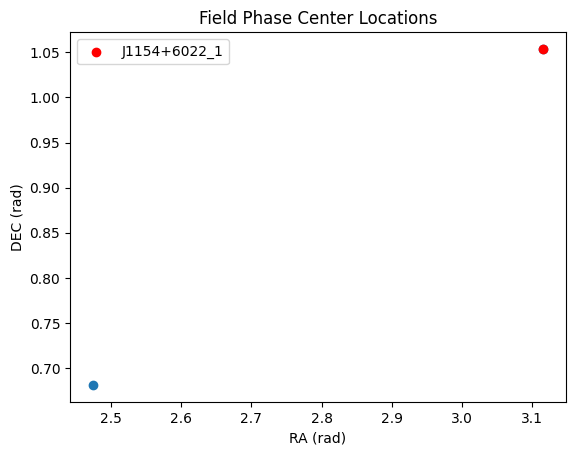

In [16]:
ps_xdt.xr_ps.plot_phase_centers()

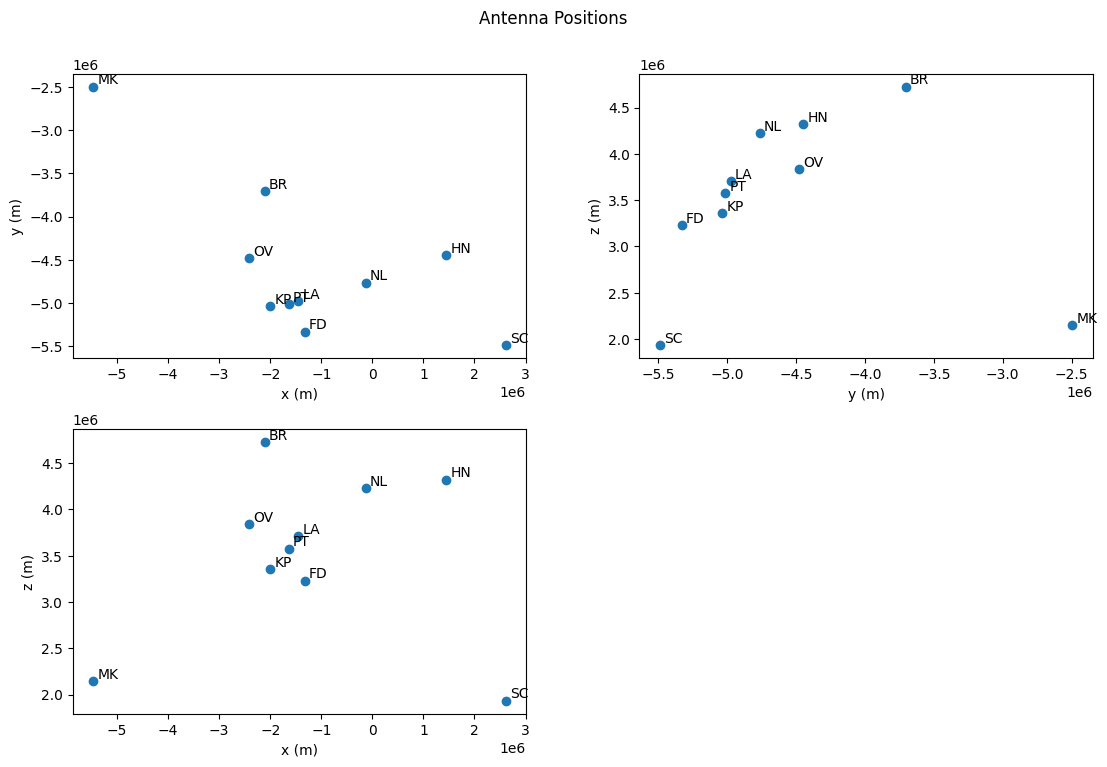

In [17]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=True)